In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyerrors as pe

In [2]:
plt.style.use('./base_style.mplstyle')
plt.rc('text', usetex=True)

We can load data from a preprocessed file which contains a list of `pyerror` `Obs`:

In [3]:
correlator_data = pe.input.json.load_json("./data/correlator_test")

Data has been written using pyerrors 2.0.0.
Format version 0.1
Written by fjosw on 2022-01-06 11:11:19 +0100 on host XPS139305, Linux-5.11.0-44-generic-x86_64-with-glibc2.29

Description:  Test data for the correlator example


With this list a `Corr` object can be initialised

In [4]:
my_correlator = pe.Corr(correlator_data)

In [5]:
my_correlator.print([8, 14])

Corr T=96 N=1
x0/a	Corr(x0/a)
------------------
8	 548(13)
9	 433(11)
10	 343.1(8.6)
11	 273.2(6.6)
12	 217.5(5.6)
13	 172.9(4.9)
14	 137.6(4.6)



The `show` method can display the correlator

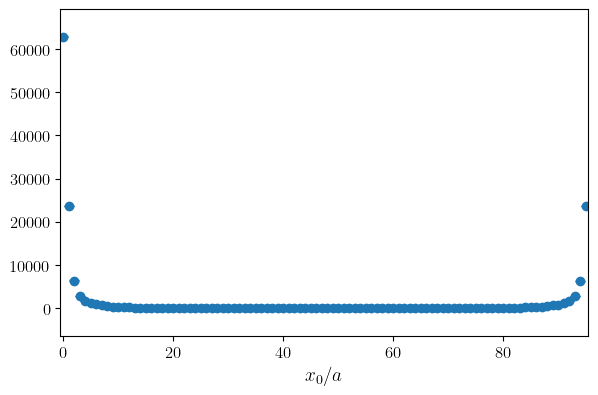

In [6]:
my_correlator.show()

## Manipulating correlators

`Corr` objects can be shifted

In [7]:
shifted_correlator = my_correlator.roll(20)
shifted_correlator.tag = r'Correlator shifted by $x_0/a=20$'

or symmetrised

In [8]:
symmetrised_correlator = my_correlator.symmetric()
symmetrised_correlator.tag = 'Symmetrised correlator'

We can compare different `Corr` objects by passing `comp` to the `show` method

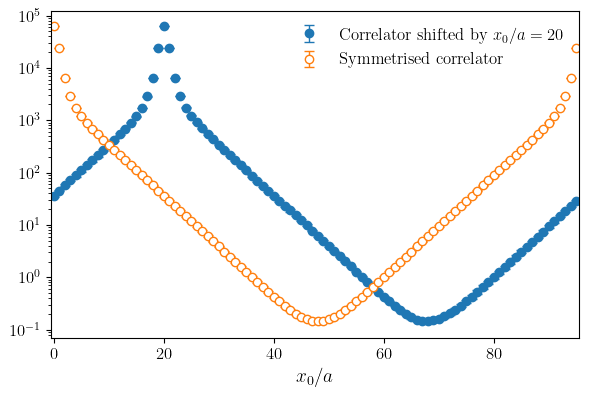

In [9]:
shifted_correlator.show(comp=symmetrised_correlator, logscale=True)

## Effective mass

The effective mass of the correlator can be obtained by calling the `m_eff` method

In [10]:
m_eff = symmetrised_correlator.m_eff()
m_eff.tag = 'Effective mass'

We can also use the priodicity of the lattice in order to obtain the cosh effective mass

In [11]:
periodic_m_eff = symmetrised_correlator.m_eff('periodic')
periodic_m_eff.tag = 'Cosh effective mass'

We can compare the two and see how the standard effective mass deviates form the plateau at the center of the lattice

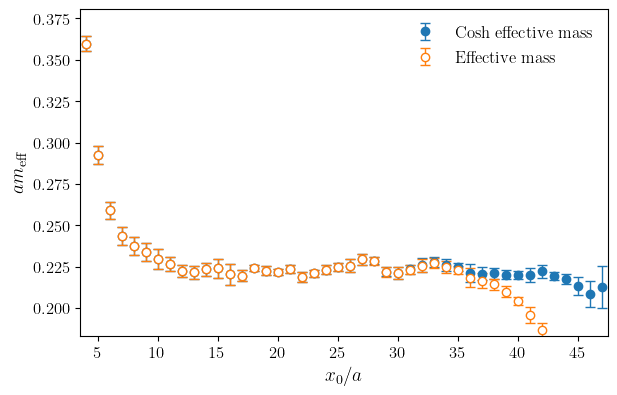

In [12]:
periodic_m_eff.show([4,47], comp=m_eff, ylabel=r'$am_\mathrm{eff}$')

Arithmetic operations and mathematical functions are also overloaded for the `Corr` class. We can compute the difference between the two variants of the effective mass as follows.

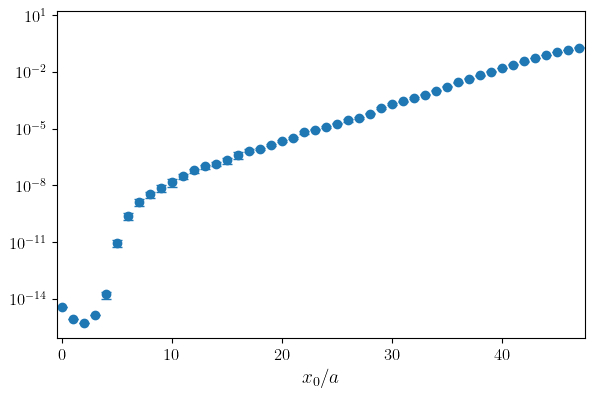

In [13]:
difference_m_eff = np.abs(periodic_m_eff - m_eff)
difference_m_eff.show([0, 47], logscale=True)

## Derivatives

We can obtain derivatives of correlators in the following way

In [14]:
first_derivative = symmetrised_correlator.deriv()
first_derivative.tag = 'First derivative'

In [15]:
second_derivative = symmetrised_correlator.second_deriv()
second_derivative.tag = 'Second derivative'

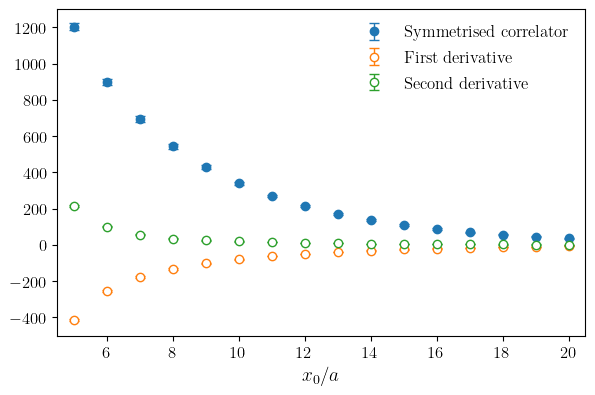

In [16]:
symmetrised_correlator.show([5, 20], comp=[first_derivative, second_derivative], y_range=[-500, 1300])

## Missing Values 

Apart from the build-in functions, there is another reason, why one should use a **Corr** instead of a list of **Obs**. 
Missing values are handled for you. 
We will create a second correlator with missing values. 

In [26]:
new_content=[(my_correlator.content[i] if i not in [6,8,9,12,14,15,20] else None ) for i in range(my_correlator.T) ] # We reuse the old example and replace a few values with None
correlator_incomplete=pe.Corr(new_content)

correlator_incomplete


Corr T=96 N=1
x0/a	Corr(x0/a)
------------------
0	 62865(41)
1	 23756(32)
2	 6434(25)
3	 2886(20)
4	 1735(21)
5	 1213(21)
6
7	 699(17)
8
9
10	 343.1(8.6)
11	 273.2(6.6)
12
13	 172.9(4.9)
14
15
16	 88.0(3.9)
17	 70.6(3.2)
18	 56.6(2.6)
19	 45.3(2.1)
20
21	 29.2(1.4)
22	 23.4(1.2)
23	 18.90(99)
24	 15.26(74)
25	 12.26(54)
26	 9.82(40)
27	 7.84(32)
28	 6.21(24)
29	 4.93(18)
30	 3.93(13)
31	 3.142(92)
32	 2.519(66)
33	 2.013(49)
34	 1.609(41)
35	 1.287(35)
36	 1.024(28)
37	 0.820(23)
38	 0.661(20)
39	 0.532(16)
40	 0.429(14)
41	 0.348(11)
42	 0.2858(85)
43	 0.2357(80)
44	 0.1985(87)
45	 0.1722(90)
46	 0.1558(90)
47	 0.1473(94)
48	 0.1453(98)
49	 0.150(10)
50	 0.161(10)
51	 0.179(11)
52	 0.205(13)
53	 0.240(17)
54	 0.288(21)
55	 0.349(27)
56	 0.427(35)
57	 0.524(42)
58	 0.648(50)
59	 0.804(63)
60	 0.997(77)
61	 1.239(91)
62	 1.55(11)
63	 1.96(14)
64	 2.46(16)
65	 3.08(19)
66	 3.83(22)
67	 4.76(26)
68	 5.96(31)
69	 7.47(37)
70	 9.36(49)
71	 11.75(62)
72	 14.75(75)
73	 18.53(87)
74	 23.2(1.0

We see that this is still a valid correlator. It is just missing some values. 
When we perform operations, which generate new correlators, the missing values are handled automatically.

Here is an example:

In [27]:
some_new_corr=np.sin(my_correlator+2*correlator_incomplete)

some_new_corr

Corr T=96 N=1
x0/a	Corr(x0/a)
------------------
0	-0(115)
1	-1(58)
2	 1.0(2.7)
3	 1(33)
4	-0(57)
5	 0(56)
6
7	-1(27)
8
9
10	-1(11)
11	 0(19)
12
13	-0(13)
14
15
16	 0(12)
17	-0.9(3.7)
18	 0.1(7.8)
19	-0.8(4.1)
20
21	-0.4(3.9)
22	 0.9(1.8)
23	 0.2(2.9)
24	 0.97(50)
25	-0.80(97)
26	-0.93(45)
27	-0.999(52)
28	-0.22(71)
29	 0.80(32)
30	-0.70(27)
31	-0.00(28)
32	 0.957(58)
33	-0.24(14)
34	-0.993(14)
35	-0.658(79)
36	 0.070(84)
37	 0.630(54)
38	 0.917(23)
39	 0.9997(12)
40	 0.960(11)
41	 0.865(17)
42	 0.756(17)
43	 0.650(18)
44	 0.561(22)
45	 0.494(23)
46	 0.451(24)
47	 0.428(25)
48	 0.422(27)
49	 0.435(27)
50	 0.464(27)
51	 0.511(28)
52	 0.577(32)
53	 0.660(38)
54	 0.760(41)
55	 0.867(41)
56	 0.958(30)
57	 1.00000(28)
58	 0.931(55)
59	 0.67(14)
60	 0.15(23)
61	-0.54(23)
62	-0.999(17)
63	-0.40(37)
64	 0.88(23)
65	 0.19(57)
66	-0.89(31)
67	 0.99(10)
68	-0.83(52)
69	-0.4(1.0)
70	 0.2(1.4)
71	-0.6(1.4)
72	 0.3(2.2)
73	-0.8(1.5)
74	 0.4(2.8)
75	-0.7(2.6)
76	 0.7(3.1)
77	-1.00(55)
78	 0.99(84)
79

Some functions might also return correlators with missing values. We already looked at the forward derivative. 
The forward derivative is not defined for the last value. 

The important thing is that, whatever you do, correlators keep their length **T**. So there will never be confusion about how you count timeslices. 



In [19]:
assert first_derivative.T==my_correlator.T==len(first_derivative.content)==len(my_correlator.content)
assert first_derivative.content[-1]==None


You can also take a plateau or perform a fit, even though some values might be missing. 

There is a range of addtional methods of the `Corr` class which can be found in the documentation.

## Matrix Correlators

A correlator can not only contain a list of Obs, but also a list of matrices of obs. 
This is useful, if there are multiple sources and sinks used. In our example, the sources have a different Gaussian smearing applied. 

We will load such a correlator.

In [20]:
matrix_V1V1= pe.input.json.load_json("./data/matrix_correlator_V1V1")

print(matrix_V1V1.content[0]) 

Data has been written using pyerrors 2.0.0+dev.
Format version 0.1
Written by jan on 2022-01-27 10:49:51 +0100 on host endwings, Linux-5.13.0-27-generic-x86_64-with-glibc2.10
[[Obs[0.95214(67)] Obs[0.01240(11)] Obs[0.005965(72)] Obs[0.002719(40)]]
 [Obs[0.01241(12)] Obs[0.004389(60)] Obs[0.002672(41)] Obs[0.001432(25)]]
 [Obs[0.005975(74)] Obs[0.002672(41)] Obs[0.001741(29)] Obs[0.000990(18)]]
 [Obs[0.002729(41)] Obs[0.001433(25)] Obs[0.000990(18)] Obs[0.000596(12)]]]


We printed out the content at timeslice 0. As we can see, it is a matrix of Obs. 

Let us try to get the effective mass. 


In [21]:
try:
    matrix_V1V1.m_eff() #This does not work! 
except:
    print("Something is wrong")

Something is wrong


Many methods we could use for regular correlators do not work with matrix-correlators. 
In order to get the effective mass, we need to convert to a regular correlator first. 

One way to do it, is to pick a smearing out of the matrix:

In [22]:
single_smearing=matrix_V1V1.smearing(0,0)
single_smearing

Corr T=64 N=1
x0/a	Corr(x0/a)
------------------
0	 0.95214(67)
1	 0.05672(10)
2	 0.008450(29)
3	 0.0016713(95)
4	 0.0004133(34)
5	 0.0001174(12)
6	 0.00003618(40)
7	 0.00001171(15)
8	 0.000003917(58)
9	 0.000001333(22)
10	 0.0000004611(96)
11	 0.0000001613(34)
12	 0.0000000571(13)
13	 0.00000002021(49)
14	 0.00000000719(18)
15	 0.000000002575(69)
16	 0.000000000927(27)
17	 0.000000000334(11)
18	 0.0000000001197(44)
19	 0.0000000000430(17)
20	 0.00000000001544(66)
21	 0.00000000000553(25)
22	 0.000000000001987(93)
23	 0.000000000000715(34)
24	 0.000000000000258(12)
25	 0.0000000000000933(47)
26	 0.0000000000000338(18)
27	 0.00000000000001230(71)
28	 0.00000000000000445(27)
29	 0.00000000000000163(10)
30	 0.000000000000000606(38)
31	 0.000000000000000244(15)
32	 0.0000000000000001549(82)
33	 0.000000000000000236(17)
34	 0.000000000000000575(46)
35	 0.00000000000000155(12)
36	 0.00000000000000424(32)
37	 0.0000000000000117(11)
38	 0.0000000000000324(30)
39	 0.0000000000000903(96)
40	 0.0

**.smearing(i,j)** picks the element [i,j] from every matrix and returns a correlator containing one Obs per timeslice. 
But there is a more usefull way to retrieve a single value per timeslice. 
We might want a linear combination of different sources and sinks. 
We can formalize this as

$$C_{\textrm{projected}}(t)=v_1^T \underline{C}(t) v_2$$

If we choose the vectors to be $v_1=v_2=(0,1,0,0)$, we should get the same correlator as in the cell above. 

Thinking about it this way is usefull in the Context of the generalized eigenvalue problem (GEVP), used to find the source-sink combination, which best describes a certain energy eigenstate.
A good introduction is found in https://arxiv.org/abs/0902.1265.

In [28]:
vec=matrix_V1V1.GEVP(t0=3,ts=6,state=0)
assert len(vec)==matrix_V1V1.N
vec

array([  -0.71920537,  162.3903938 , -492.21321233,  714.06804297])

As we see, the eigenvector is of length **matrix_V1V1.N** and contains regular floats. 
We can use it to project the correlator. 

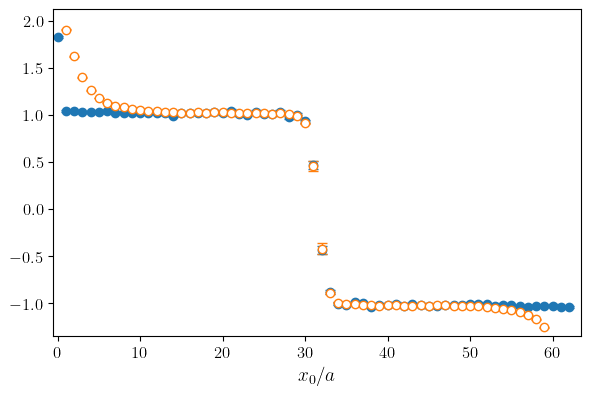

In [29]:
matrix_V1V1.projected(vec).m_eff().show(comp=single_smearing.m_eff())

There is a lot going on in this line of code. 
We start with our matrix correlator and we project it, using the vector we got from the GEVP routine. 

This gives us a new correlator with one Obs per timeslice. We then calculate its effective mass and plot it. 
We tell the **.plot()** function to show another correlator as a comparison. 

We can see, that the projected correlator (*blue*) converges to a mass plateau much quicker than the single smearing.

## Example Analysis

We can use what we learned so far to perform an actually usefull analysis. 
The correlator **matrix_V1V1** we looked at corresponds to vector-charmonium. 

We might be interested in the mass of the $J/\Psi$ state.

Data has been written using pyerrors 2.0.0+dev.
Format version 0.1
Written by jan on 2022-01-27 10:49:51 +0100 on host endwings, Linux-5.13.0-27-generic-x86_64-with-glibc2.10
Data has been written using pyerrors 2.0.0+dev.
Format version 0.1
Written by jan on 2022-01-27 10:49:51 +0100 on host endwings, Linux-5.13.0-27-generic-x86_64-with-glibc2.10
Fit with 1 parameter
Method: Levenberg-Marquardt
`ftol` termination condition is satisfied.
chisquare/d.o.f.: 0.37168849195965686
--- The mass was calculated to be 3069.4(9.4) MeV ---


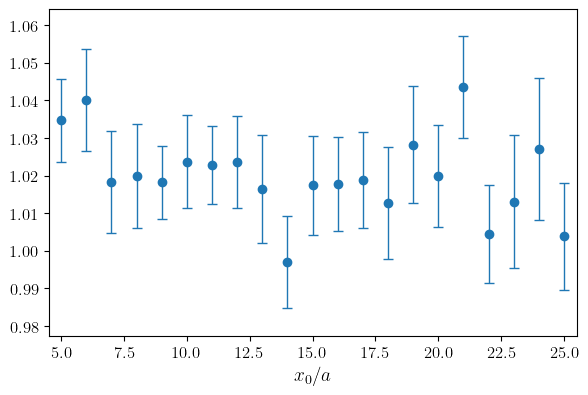

In [30]:
# We do not just have V1V1, but also the two other spacial directions. We can average over them for better statistics. 
matrix_V2V2= pe.input.json.load_json("./data/matrix_correlator_V2V2")
matrix_V3V3= pe.input.json.load_json("./data/matrix_correlator_V3V3")
matrix_VnVn=(matrix_V1V1+matrix_V2V2+matrix_V3V3)/3. 

#We then solve the GEVP to get eigenvectors corresponding to the ground state. 

vec_ground=matrix_VnVn.GEVP(t0=3,ts=6,state=0)

#Now we project the matrix-correlators to get new correlators belonging to the ground state.

corr_ground=matrix_VnVn.projected(vec_ground)

# We get the effective mass using the periodic cosh method. 

m_eff_Jpsi=corr_ground.m_eff(variant="cosh")

m_eff_Jpsi.show([5,25])

#From the plot we can pick a plateau range and get a single value for the mass. 

m_Jpsi=m_eff_Jpsi.plateau([8,18])


# Since the lattice spacing is known, we can multiply with hbar*c/a to see it in physical units 

m_Jpsi=m_Jpsi*197/0.0653

#As a last step we call the gamma method to get the error 

m_Jpsi.gamma_method()

print("--- The mass was calculated to be" , m_Jpsi, "MeV ---")
